In [1]:
import pandas as pd
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.columns[df.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [3]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/var/folders/sq/0c4j_x091jngfd2nls5zlk240000gn/T/ipykernel_23450/694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [4]:
df.columns[df.isna().any()]

Index(['Cabin', 'Embarked'], dtype='object')

In [5]:
#remove columns that are not required
df.drop(['PassengerId', 'Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [6]:
df.head()

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500


In [7]:
dummies=pd.get_dummies(df['Sex'])
dummies.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [8]:
dummies["male"] = dummies["male"].astype(int)
dummies["female"] = dummies["female"].astype(int)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [9]:
df=pd.concat([df,dummies],axis='columns')
df.head()

,Survived,Sex,Age,Fare,female,male
0,0,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,1,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,0,male,35.0,8.0500,0,1


In [10]:
df.drop('Sex',axis='columns',inplace=True)

In [11]:
df.head()

,Survived,Age,Fare,female,male
0,0,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,1,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,0,35.0,8.0500,0,1


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['Age','Fare','male','female']],df['Survived'],test_size=0.2,random_state=40)

In [13]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
predict=model.predict(x_test)
predict

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1])

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(y_test,predict)
accuracy

0.8100558659217877

In [15]:
clog=confusion_matrix(y_test,predict)
print(clog)

[[88 15]
 [19 57]]


In [16]:
crlog=classification_report(y_test,predict)
print(crlog)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       103
           1       0.79      0.75      0.77        76

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [17]:
from sklearn.neighbors import KNeighborsClassifier
k=3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
predictknn=knn.predict(x_test)
predictknn

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0])

In [18]:
accuracyknn=accuracy_score(y_test,predictknn)
accuracyknn

0.7039106145251397

In [19]:
cknn=confusion_matrix(y_test,predictknn)
print(cknn)

[[78 25]
 [28 48]]


In [20]:
crknn=classification_report(y_test,predictknn)
print(crknn)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       103
           1       0.66      0.63      0.64        76

    accuracy                           0.70       179
   macro avg       0.70      0.69      0.70       179
weighted avg       0.70      0.70      0.70       179



In [21]:
my=df.drop(['Survived'],axis='columns')
target=df['Survived']

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_gini = DecisionTreeClassifier(criterion="gini",random_state=100, max_depth=3, min_samples_leaf=5)
dt_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [23]:
dtpredg=dt_gini.predict(x_test)
dtpredg

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1])

In [24]:
dtaccg=accuracy_score(y_test,dtpredg)
dtaccg

0.8100558659217877

In [25]:
dtcmg=confusion_matrix(y_test,dtpredg)
print(dtcmg)

[[89 14]
 [20 56]]


In [26]:
dtcrg=classification_report(y_test,dtpredg)
print(dtcrg)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       103
           1       0.80      0.74      0.77        76

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



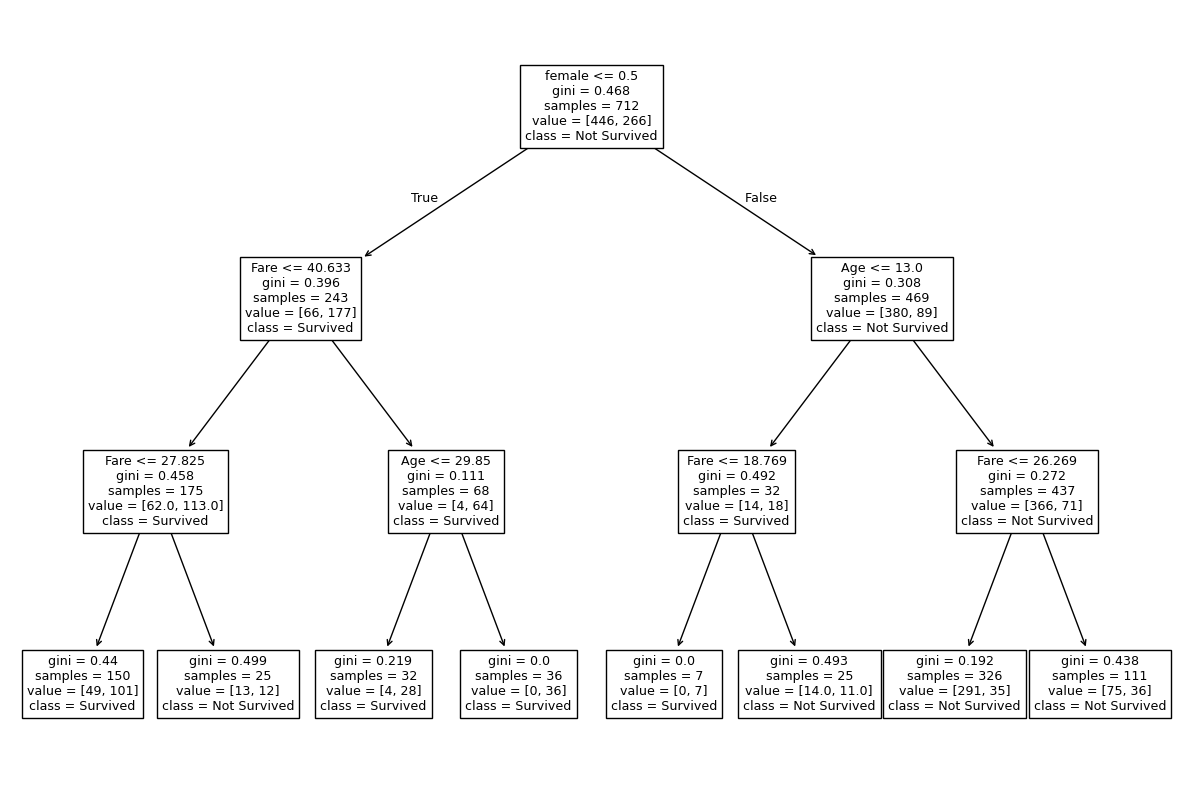

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plot_tree(dt_gini,feature_names=my.columns,class_names=['Not Survived','Survived'])
plt.show()

In [28]:
dt_ent = DecisionTreeClassifier(criterion="entropy",random_state=100, max_depth=3, min_samples_leaf=5)
dt_ent.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [29]:
dtprede=dt_ent.predict(x_test)
dtprede

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1])

In [30]:
dtacce=accuracy_score(y_test,dtprede)
dtacce

0.7988826815642458

In [31]:
dtcme=confusion_matrix(y_test,dtprede)
print(dtcme)

[[87 16]
 [20 56]]


In [32]:
dtcre=classification_report(y_test,dtprede)
print(dtcre)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       103
           1       0.78      0.74      0.76        76

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



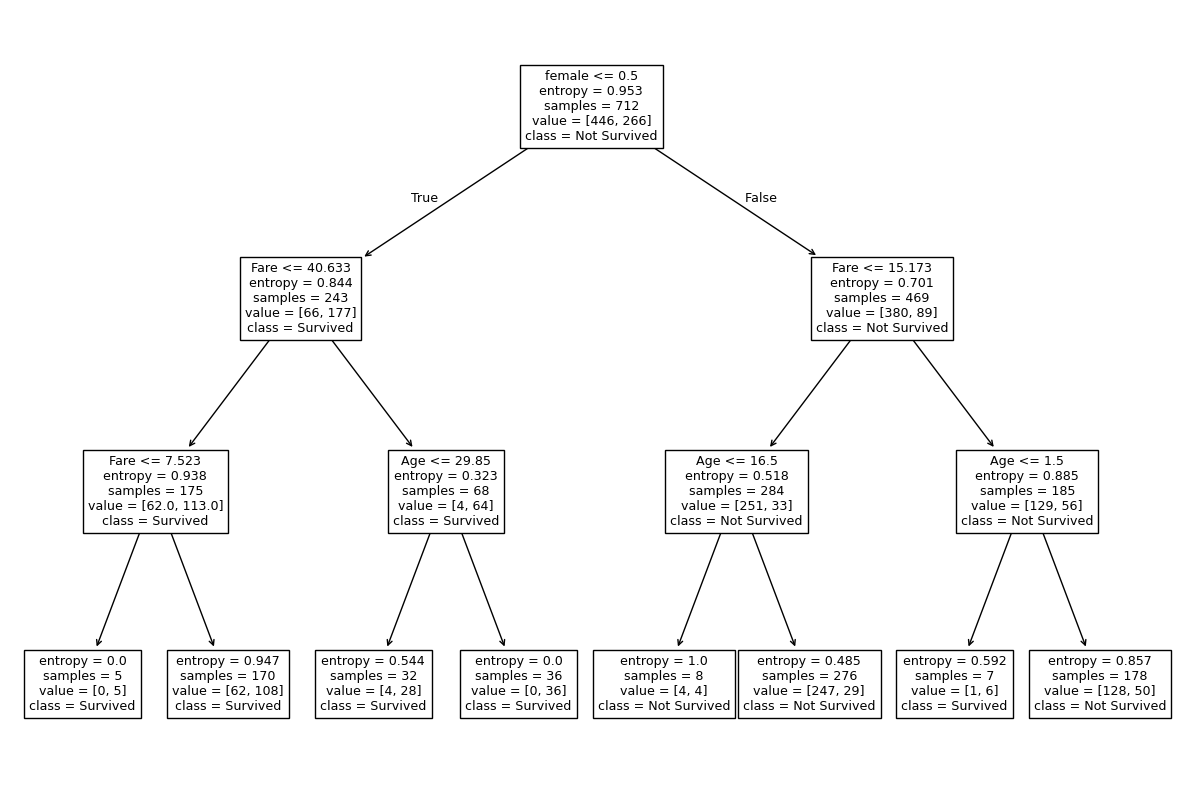

In [33]:
plt.figure(figsize=(15,10))
plot_tree(dt_ent,feature_names=my.columns,class_names=['Not Survived','Survived'])
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfclass=RandomForestClassifier(n_estimators=100,random_state=42)

In [35]:
rfclass.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [36]:
rfpred=rfclass.predict(x_test)
rfpred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1])

In [37]:
rfacc=accuracy_score(y_test,rfpred)
rfacc

0.8100558659217877